In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

df = pd.read_csv('../../data/PEMS07/PEMS07.csv')

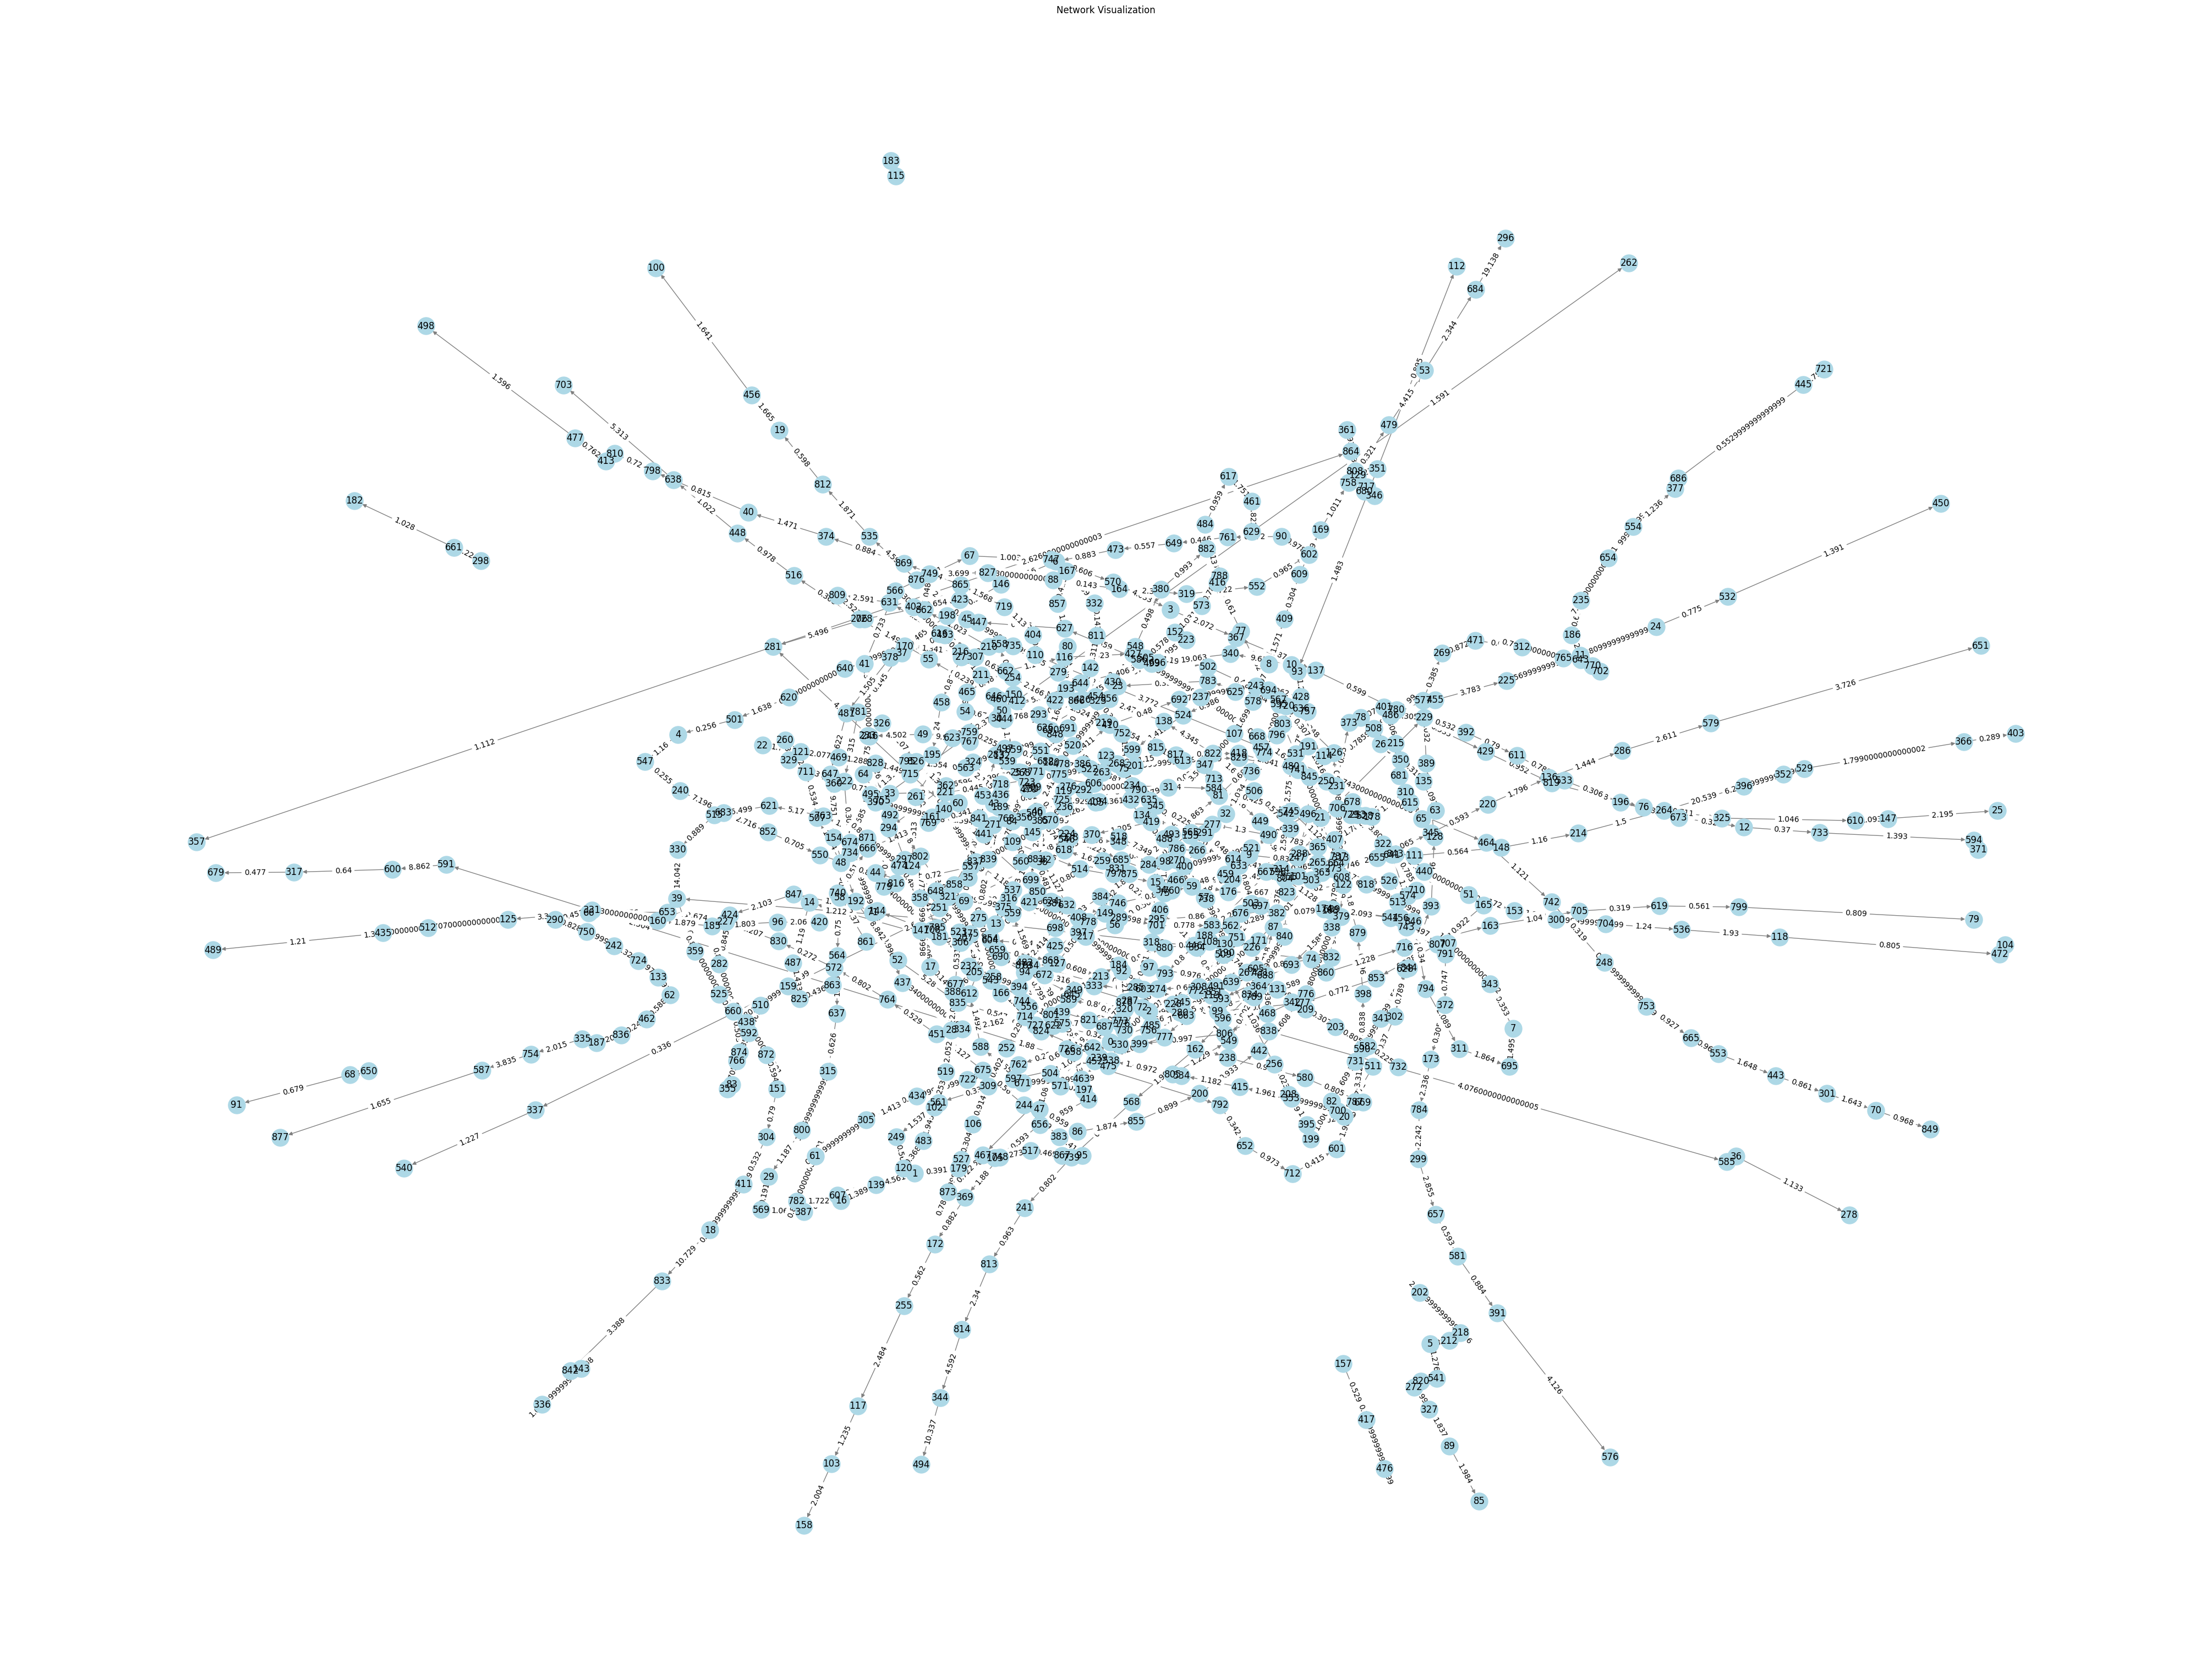

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

pos = nx.spring_layout(G)

plt.figure(figsize=(40, 30))

nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Network Visualization')
plt.show()



In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['to', 'from']]
y = df['cost']

model = LinearRegression()
model.fit(X, y)

df['Predicted_Cost'] = model.predict(X)

df['Residual'] = np.abs(df['cost'] - df['Predicted_Cost'])

threshold = df['Residual'].mean() + 2 * df['Residual'].std()

df['Anomaly'] = (df['Residual'] > threshold).astype(int)
print(df[['cost', 'Predicted_Cost', 'Residual', 'Anomaly']])


      cost  Predicted_Cost  Residual  Anomaly
0    0.790        1.448664  0.658664        0
1    2.575        1.446243  1.128757        0
2    0.926        1.370937  0.444937        0
3    0.596        1.531596  0.935596        0
4    0.628        1.593260  0.965260        0
..     ...             ...       ...      ...
861  8.862        1.408802  7.453198        1
862  1.471        1.583014  0.112014        0
863  1.596        1.443808  0.152192        0
864  0.785        1.332114  0.547114        0
865  6.296        1.490302  4.805698        1

[866 rows x 4 columns]


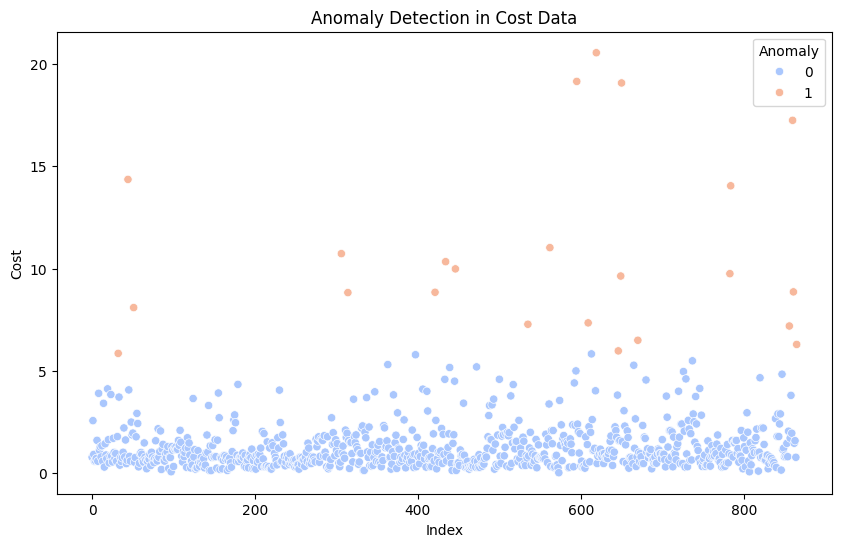

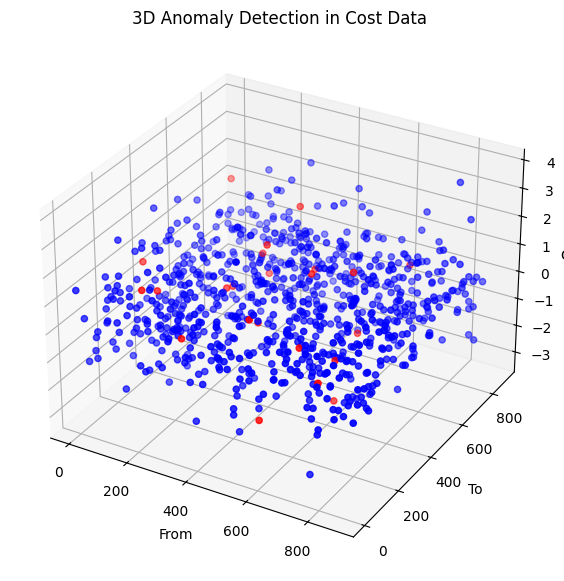

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='cost', hue='Anomaly', palette='coolwarm', marker='o')
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Anomaly Detection in Cost Data')
plt.show()

np.random.seed(42)
df['cost'] = np.random.normal(size=len(df))

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
colors = df['Anomaly'].apply(lambda x: 'red' if x == 1 else 'blue')
sc = ax.scatter(df['from'], df['to'], df['cost'], c=colors, marker='o')

ax.set_xlabel('From')
ax.set_ylabel('To')
ax.set_zlabel('Cost')
ax.set_title('3D Anomaly Detection in Cost Data')

plt.show()

In [11]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df[['cost']], df['Anomaly'])
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.100


In [12]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(df[['cost']], df['Anomaly'])

print(f'Davies-Bouldin Index: {dbi:.3f}')

Davies-Bouldin Index: 6.065
